In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#### An example of image to perform key points detection   

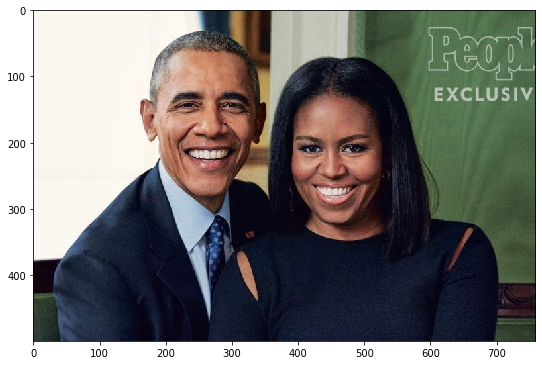

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)


### pre-trained Haar Cascade classifier to detect faces in image

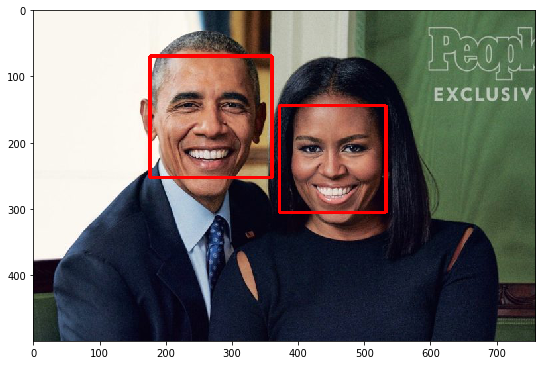

In [3]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(image, 1.3,3)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

In [4]:
import torch
from model import Net
net = Net()
net.load_state_dict(torch.load('saved_models/Shubham_facial_keypoints_20epoch.pt'))
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (drop1): Dropout2d(p=0.1, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2): Dropout2d(p=0.2, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop3): Dropout2d(p=0.3, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (conv4_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop4): Dropout2d(p=0.4, inplace=False)
  (fc1): Linear(in_features=25600, out_features=2048, bias=True)
  (fc1_bn): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop5): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2_bn): BatchNorm1d(1024,

## Determining Key Points of the image

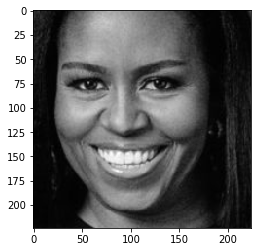

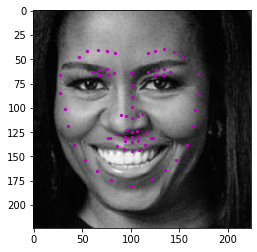

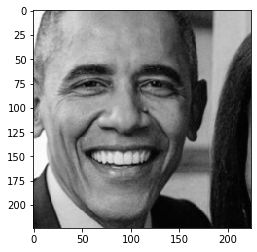

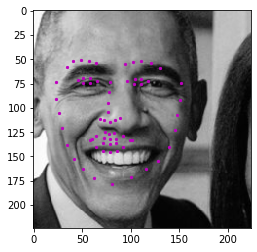

In [9]:
image_copy = np.copy(image)
from torch.autograd import Variable
# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    plot = image_copy[y:y+int(1.2*h), x:x+int(1.2*w), :]
    
    
    #Convert the face region from RGB to grayscale
    plot_gray = cv2.cvtColor(plot, cv2.COLOR_RGB2GRAY)
    

    #Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    plot_gray = plot_gray/255.0
    
    #Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    plot_gray = cv2.resize(plot_gray, (224, 224))
    image_plot = np.copy(plot_gray)
    plot_gray= plot_gray.reshape(plot_gray.shape[0], plot_gray.shape[1], 1)
    
    
    #Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    plot_gray = np.transpose(plot_gray, (2, 0, 1))
    plot_gray = torch.from_numpy(plot_gray)
    
    plot_gray = plot_gray.type(torch.FloatTensor)
    plot_gray = plot_gray.unsqueeze(0)
    
    predicted_key_pts = net(plot_gray)
    predicted_key_pts = predicted_key_pts.view( 68, -1)
    predicted_key_pts = predicted_key_pts.data
    predicted_key_pts = predicted_key_pts.cpu().numpy()
    predicted_key_pts = predicted_key_pts*50.0+90
     
    plt.imshow(image_plot, cmap='gray')
    plt.show()
    plt.imshow(image_plot, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    plt.show()